## <font color = #0080ff> Clustering</font>

In [204]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [205]:
# Import the dataset
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [206]:
print("Data type : ", type(df))
print("Data dims : ", df.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2240, 29)


In [207]:
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


In [208]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Data Cleaning

In [209]:
# Drop columns with single values
df.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

In [210]:
# Check for null values
for i in df.columns:
    if df[i].isna().sum() != 0:
        print("Feature Name:", i, "\nNull Values Count:", df[i].isna().sum())

Feature Name: Income 
Null Values Count: 24


Since there is only 24 out of 2240 null values in the Income column, we will just drop them.

Include a new feature to indicate age of customers

In [211]:
# Get most recent date a customer enrolled with the company to use the corresponding year as reference
df['Dt_Customer'] =  pd.to_datetime(df['Dt_Customer'])
max(df['Dt_Customer'])

Timestamp('2014-12-06 00:00:00')

In [212]:
# Since 2014 is the most recent year, we're gonna use 2015 as reference
df["Age"] = 2015 - df["Year_Birth"]

### Since we are doing clustering, its best to simplify whichever columns possible.

First, we will simplify 'Education' column

In [213]:
df["Education"].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

We simplify by categorising them as Undergraduate, Graduate and Post-Graduate.

In [214]:
df["Education"] = df["Education"].replace({"Basic":"Undergraduate", "Graduation":"Graduate", "2n Cycle":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df["Education"].value_counts()

Graduate         1330
Postgraduate      856
Undergraduate      54
Name: Education, dtype: int64

Next, we simplify 'Marital_Status'

In [215]:
df["Marital_Status"].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [216]:
# Include new feature "Couple"
# 1 if couple, 0 if not
df["Couple"] = df["Marital_Status"].apply(lambda x: 1 if (x == "Married" or x == "Together") else 0)
df["Couple"].value_counts()

1    1444
0     796
Name: Couple, dtype: int64

We can also combine 'Teenhome' & 'Kidhome' together to get total number of children for each customer.

In [217]:
df["NoOfChildren"] = df["Teenhome"] + df["Kidhome"]

We can include a feature to include total spending of each customer by combining all specific product-spending columns.

In [218]:
df["TotalSpend"] = df["MntWines"] + df["MntMeatProducts"] + df["MntFruits"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

We include a feature to indicate total campaigns accepted by a customer by combining all the specific campaigns they had accepted.

In [219]:
df["TotalAcceptedCmp"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df["Response"]

In [220]:
# Drop all the redundant featues
to_drop = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer']
df.drop(to_drop, axis=1, inplace=True)
print(df.dtypes)

Education               object
Income                 float64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
Age                      int64
Couple                   int64
NoOfChildren             int64
TotalSpend               int64
TotalAcceptedCmp         int64
dtype: object


### Next, check for outliers from 'Income', 'TotalSpend' and 'Age' by plotting boxplots

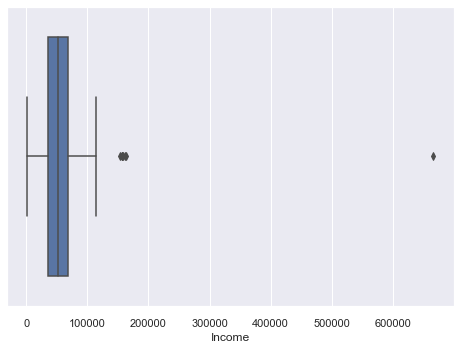

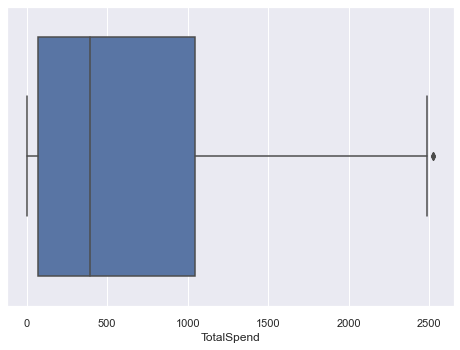

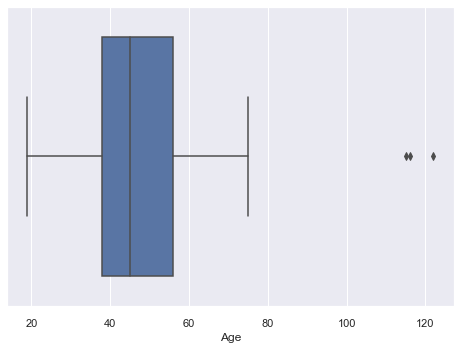

In [221]:
for i in df[["Income", "TotalSpend", "Age"]]:
    plt.figure(i)
    sb.boxplot(data=df, x=i)

We see an outlier for 'Income' with value above $600000.
We also see an outlier for 'Age' with 3 customers being above 100 years old.
Outliers will affect the clustering. Also, since there's only a few of them, we will drop them.

In [222]:
df = df[df["Income"] < 600000]
df = df[df["Age"] < 100]

### Exploratory Data Analysis

In [223]:
df.groupby("Response")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1879.0,50496.58,20887.37,1730.0,34416.5,50150.0,66298.5,162397.0
1,333.0,60209.68,23194.08,7500.0,39763.0,64090.0,80589.0,105471.0


We see that customers who had accepted 'Response' campaign had a higher mean of income despite the count being 6 times less than those who didn't accept.<br>
This shows that Income may be a strong factor.

In [224]:
df.groupby("Response")["TotalSpend"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1879.0,540.21,553.19,5.0,62.0,315.0,958.5,2525.0
1,333.0,985.66,719.39,17.0,252.0,1053.0,1617.0,2525.0


Those who had accepted also have higher total spendings on the products despite being the minority.

In [225]:
df.groupby("Response")["Age"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Response,,,,,,,,
0,1879.0,46.19,11.59,19.0,38.0,45.0,56.0,75.0
1,333.0,45.50,12.33,19.0,36.0,44.0,56.0,72.0


It seems like age may not be a factor as the mean age is almost the same.

In [226]:
df.groupby("TotalAcceptedCmp")["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
TotalAcceptedCmp,,,,,,,,
0,1608.0,48292.85,20404.27,1730.0,33181.75,46927.0,63793.00,162397.0
1,368.0,56750.80,20356.12,5648.0,40579.50,58532.0,73741.25,98777.0
2,139.0,61659.04,21751.93,7500.0,46015.00,68117.0,78628.00,96843.0
3,51.0,78462.35,13516.53,37929.0,75519.00,81929.0,85471.50,105471.0
4,36.0,82143.28,11521.92,48192.0,75742.50,82171.5,90253.50,102160.0
5,10.0,86434.40,9316.60,65169.0,84561.25,86727.0,90321.75,102692.0


It seems that those who have higher income also accepted more campaigns.

Encode categorical feature, which is Education

In [227]:
df["Education"] = df["Education"].replace({"Undergraduate":0, "Graduate":1, "Postgraduate":2})

### Proceed to clustering using Kmeans++ & KElbowVisualizer

The K-Elbow Visualizer implements the “elbow” method of selecting the optimal number of clusters for K-means clustering. In other words, it uses an unsupervised machine learning algorithm to suggest the best number of clusters for our data.

We're going to select the simplified features to use for clustering.

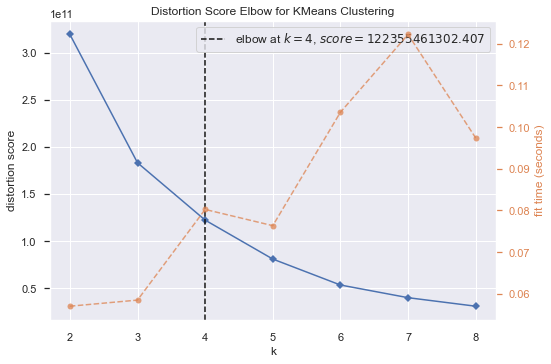

In [228]:
cluster = ['Education', 'Income', 'Age',
       'Couple', 'NoOfChildren', 'TotalSpend', 'TotalAcceptedCmp', 'Recency']

elbow = KElbowVisualizer(KMeans(), k=8)
elbow.fit(df[cluster])
elbow.show()
plt.show()

From the elbow, it looks like the optimal number of clusters is 4.

In [229]:
X = df[cluster]

# Set "optimal" Clustering Parameters
num_clust = 4
init_algo = 'k-means++'

# Create Clustering Model using KMeans
kmeans = KMeans(n_clusters = num_clust,         
               init = init_algo,
               n_init = 20)                 

# Fit the Clustering Model on the Data
kmeans.fit(X)

KMeans(n_clusters=4, n_init=20)

Within Cluster Sum of Squares : 122355784627.4906



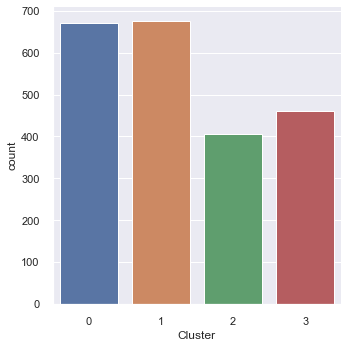

In [230]:
# Print the Within Cluster Sum of Squares
print("Within Cluster Sum of Squares :", kmeans.inertia_)
print()

# Predict the Cluster Labels
labels = kmeans.predict(X)

# Append Labels to the Data
df["Cluster"] = pd.Categorical(labels)

# Summary of the Cluster Labels
sb.catplot(x = "Cluster", data = df, kind = "count")

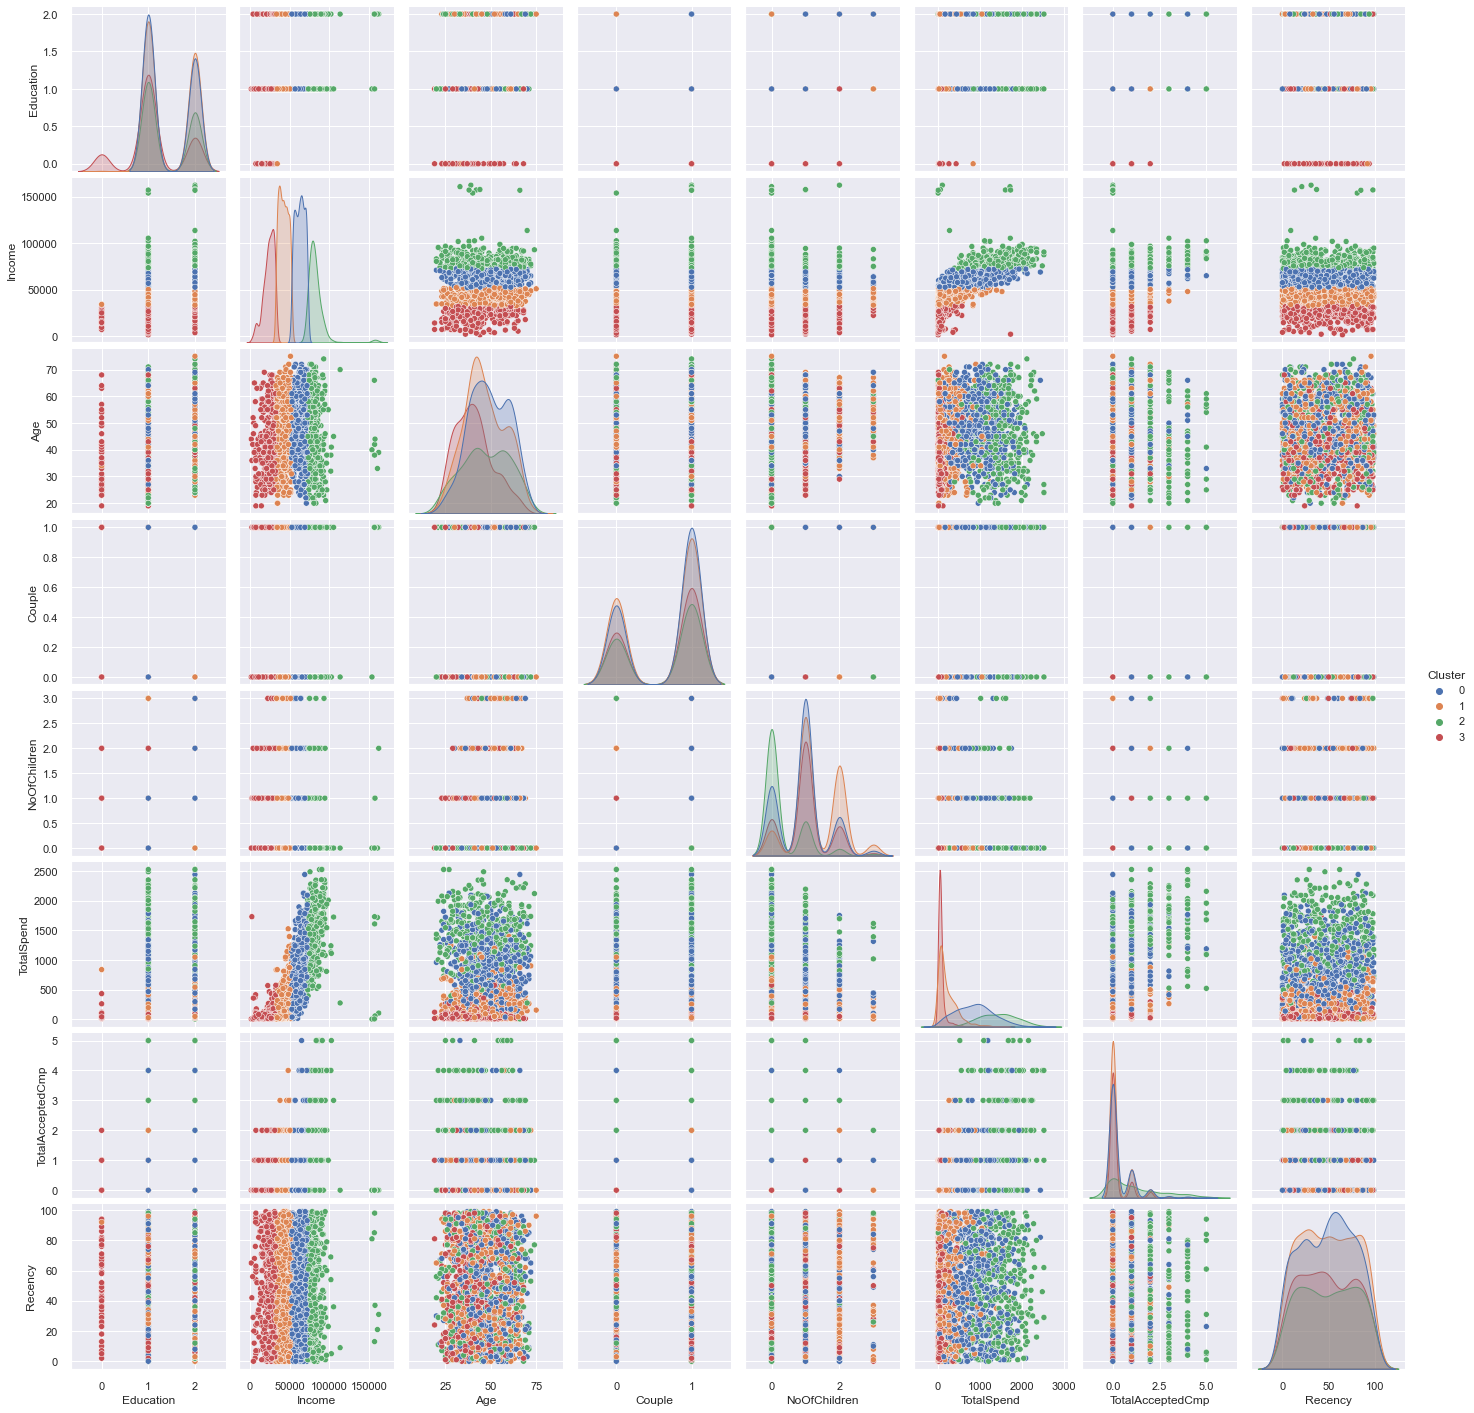

In [231]:
# Plot the Clusters on 2D grids
sb.pairplot(df, vars = X.columns.values, hue = "Cluster")

Looks like Kmeans++ cluster the data by income

<AxesSubplot:xlabel='TotalAcceptedCmp', ylabel='Cluster'>

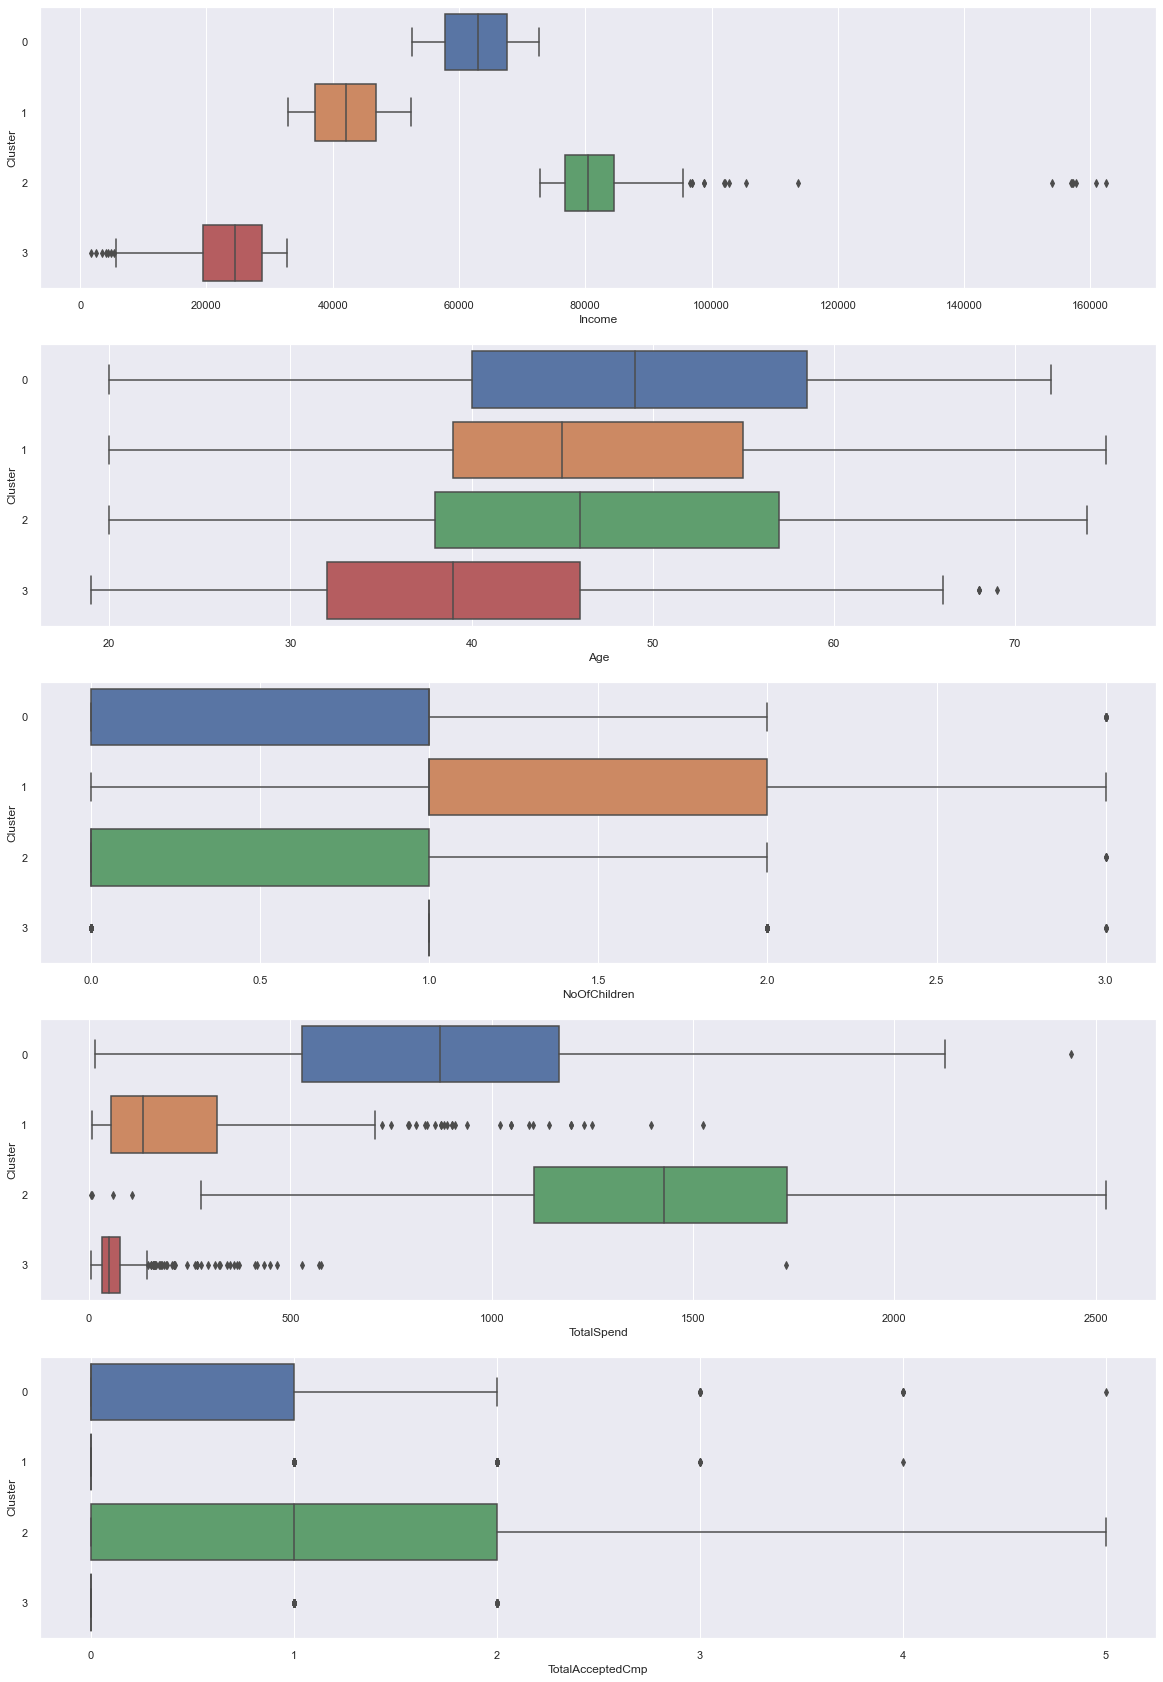

In [233]:
# Boxplots for all Features against the Clusters
f, axes = plt.subplots(5, 1, figsize=(20,30))
sb.boxplot(x = 'Income', y = 'Cluster', data = df, ax = axes[0])
sb.boxplot(x = 'Age', y = 'Cluster', data = df, ax = axes[1])
sb.boxplot(x = 'NoOfChildren', y = 'Cluster', data = df, ax = axes[2])
sb.boxplot(x = 'TotalSpend', y = 'Cluster', data = df, ax = axes[3])
sb.boxplot(x = 'TotalAcceptedCmp', y = 'Cluster', data = df, ax = axes[4])

* It seems that Cluster 2 has the highest income, followed by 0, then 1, then 3.
* TotalSpend follows the same order.
* Hence, Income and TotalSpend are proportional to each other.
* Cluster 2 also accepted more campaigns, followed by 0. (Might be a factor)
* Age-wise, Cluster 3 has the average youngest customers. The rest is about the same.
* Cluster 3 also has highest ratio of 1 child, Cluster 1 having most children. 2 and 0 are about the same.

* Cluster 3 might actually be undergraduates since they're the youngest & their income the lowest. 

Let's explore further to test our hypothesis.

We will take a look at amount purchased on individual items.

#### Check amount spent on individual items

In [234]:
df.groupby("Cluster")[["Income", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]].mean().round(2)

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Cluster,,,,,,,
0,62825.14,475.91,35.80,205.99,50.13,35.83,63.00
1,42191.01,120.69,7.97,46.55,13.11,8.54,27.43
2,82717.04,657.00,64.57,468.72,91.10,67.55,71.12
3,23381.95,18.02,5.83,21.63,8.44,5.77,16.40


* Cluster 2, highest income group, spent most on wine among the clusters. It also spent most on wine out of all the products, followed by meat.


We will check the percentage spent on each product out of total spending for every cluster.

In [235]:
# Convert to percentage
items = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
alplist = []
for i in items:
    i = pd.DataFrame({i:(df.groupby("Cluster")[i].sum() / df.groupby("Cluster")["TotalSpend"].sum() * 100).round(1)})
    alplist.append(i)
pd.concat(alplist, axis=1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Cluster,,,,,,
0,54.9,4.1,23.8,5.8,4.1,7.3
1,53.8,3.6,20.8,5.8,3.8,12.2
2,46.3,4.5,33.0,6.4,4.8,5.0
3,23.7,7.7,28.4,11.1,7.6,21.6


* Cluster 2, 1st highest income, seems to take most interest on meat.
* Cluster 0, 2nd highest income, seems to take most interest on wine.
* Cluster 1, 3rd highest income, also likes to spend on wine. 
* Cluster 0, 4th highest income, takes most interest in gold compared to other clusters. It also seems to have the least interest on wine.

* Cluster 2 and 0, the two highest income clusters, are not really into gold, it seems.

#### Check age

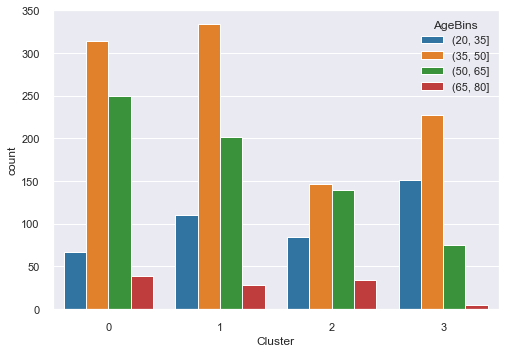

In [236]:
df["AgeBins"] = pd.cut(df["Age"], bins=[20,35,50,65,80])
sb.countplot(x=df["Cluster"], hue=df["AgeBins"], palette="tab10")
plt.show()

* Customers are mostly in the 35-50 year old range.
* Cluster 3 (4th highest) has the most youngest customers aged between 20-35. 
* Cluster 2 (1st highest) mostly ranges from 35-65 years old.
* Cluster 1 (3rd highest) is mostly between 35-50 years old.
* Cluster 0 (2nd highest) also is mostly 35-50 years old, but it has the most customers ranging between 50-65 year old.

#### Check total accepted campaigns

In [265]:
df.groupby('Cluster')['TotalAcceptedCmp'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,671.0,0.362146,0.723794,0.0,0.0,0.0,1.0,5.0
1,676.0,0.255917,0.574426,0.0,0.0,0.0,0.0,4.0
2,405.0,1.212346,1.394596,0.0,0.0,1.0,2.0,5.0
3,460.0,0.186957,0.480381,0.0,0.0,0.0,0.0,2.0


It seems like cluster 2 is the winner, followed by 0, 1 and 3. It is the same ranking as income. So it is correlated.

#### Check children

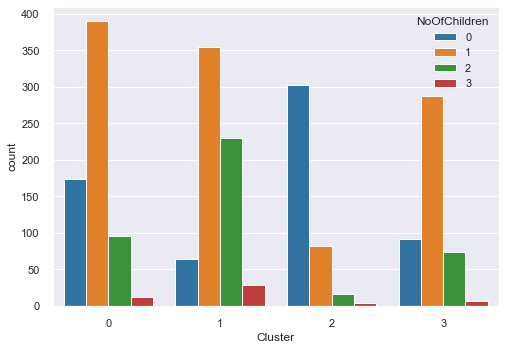

In [237]:
sb.countplot(data=df, x="Cluster", hue="NoOfChildren", palette="tab10")
plt.show()

In [242]:
df.groupby("Cluster")["NoOfChildren"].sum().round(1)

Cluster
0    618
1    898
2    126
3    454
Name: NoOfChildren, dtype: int64

* Cluster 0 and 3 has mostly 1 child
* Cluster 2, our highest income, has mostly no children
* Cluster 1 has highest ratio of 2 children and least customers with no children. This info is aligned with the barplot above where Cluster 1 has most children

* Interestingly, Cluster 3, lowest income and youngest customers, has more children than Cluster 2, highest income.

#### Check education

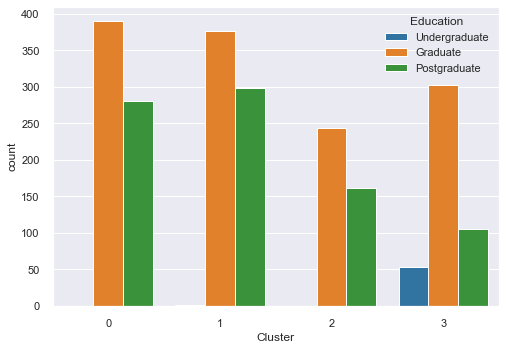

In [243]:
sb.countplot(data=df, x="Cluster", hue="Education", palette="tab10")
plt.legend(title='Education', labels=['Undergraduate', 'Graduate', 'Postgraduate'])
plt.show()

* All the undergraduates belong in Cluster 3
* At the same time, it has a lot more graduates than undergraduates, which is to say Cluster 3 has the lowest education level
* Looks like our assumption that undergraduates belong to Cluster 3 is true
* The rest of the clusters is spread evenly between graduates and postgraduates

#### Check if couple

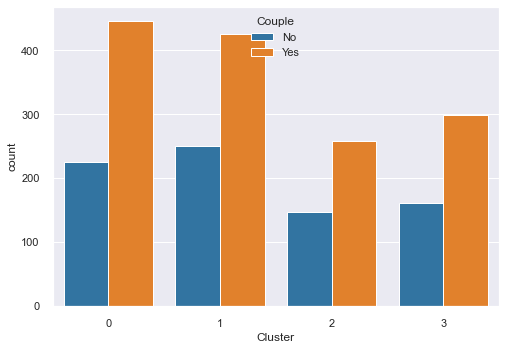

In [244]:
sb.countplot(data=df, x="Cluster", hue="Couple", palette="tab10")
plt.legend(title='Couple', labels=['No', 'Yes'], loc="upper center")
plt.show()

* Looks like this feature is fairly distributed, and our customers are mostly in relationships

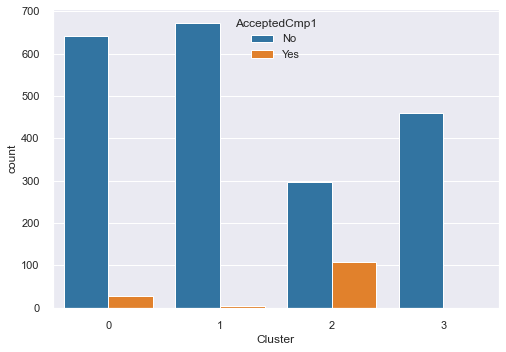

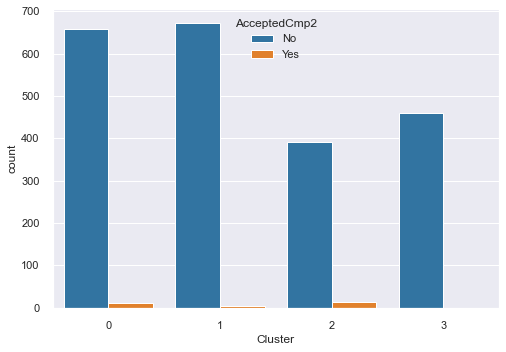

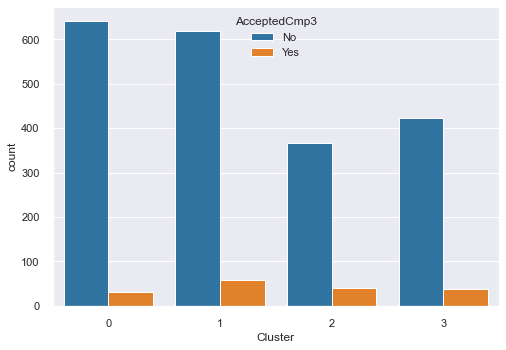

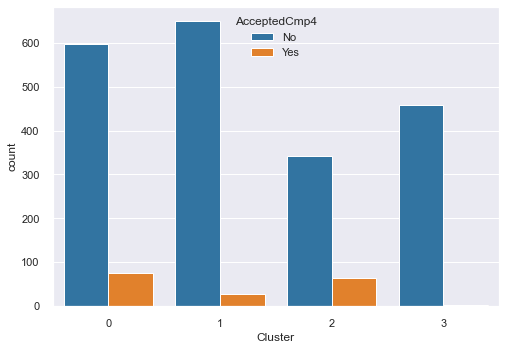

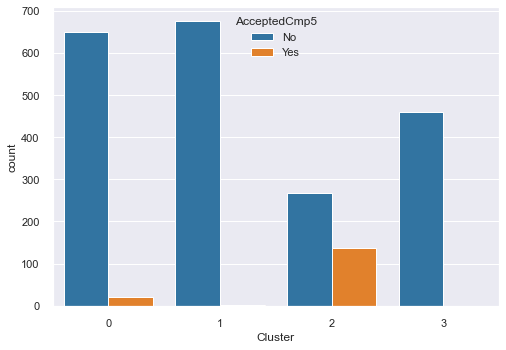

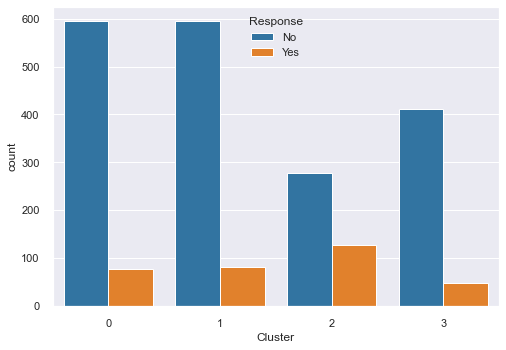

In [246]:
cmp = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]
for i in cmp:
    sb.countplot(data=df, x="Cluster", hue=i, palette="tab10")
    plt.legend(title=i, labels=['No', 'Yes'], loc="upper center")
    plt.show()

* Cluster 2, highest income, has highest ratio of customers who accepted Response.

<AxesSubplot:xlabel='Recency'>

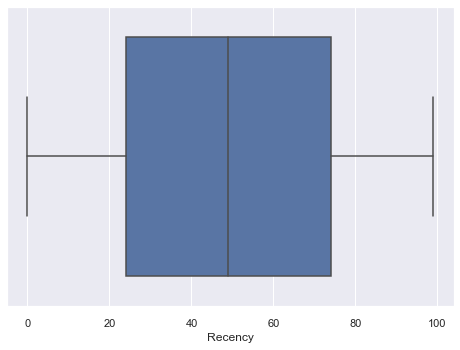

In [247]:
plt.figure('Recency')
sb.boxplot(data=df, x='Recency')

<AxesSubplot:xlabel='Recency', ylabel='Cluster'>

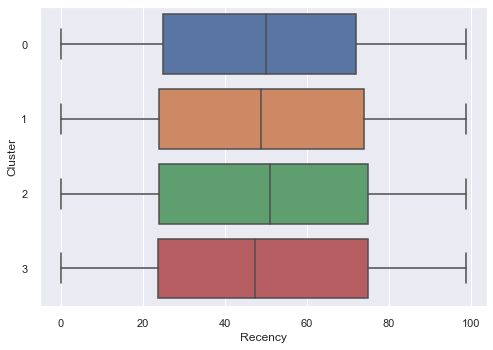

In [248]:
sb.boxplot(x = 'Recency', y = 'Cluster', data = df)

It seems like recency has no correlation.

## Conclusion

Cluster 0:
* 2nd highest income
* 2nd highest total spending
* likes to buy wine, not into gold
* ranges between 35-65 years old, most customers with range of 50-65 years old
* most customers have at least one child
* graduates & postgraduates

Cluster 1:
* 3rd highest income
* 3nd highest total spending
* likes to buy wine
* mostly range between 35-50 years old
* most no. of children (most customers have 2 children)
* graduates & postgraduates

Cluster 2:
* 1st highest income
* 1st highest total spending
* Accepted the most campaigns
* likes to buy meat, not into gold
* mostly ranges between 35-65 years old
* least no. of children (most customers have no children)
* graduates & postgraduates
* highest ratio of customers who accepted the 'Response' campaign

Cluster 3:
* 4th highest income
* 4th highest total spending
* Accepted least campaigns
* likes to buy gold, least interested in wine
* youngest group of customers (highest ratio of customers between 20-35 years old and 35-50 years old)
* most customers have at least 1 child
* all undergraduates belong here and high ratio of graduates

Notes:
* Recency has no correlation
* Response is somehow correlated, as cluster 2, highest income group, has highest ratio of acceptance for the 'Response' campaign